# Tables and Pareto

In [1]:
import matplotlib.pyplot as plt

In [2]:
def calcResourceCost(implementation):
  return ( (20/140)*implementation[0] + (20/220)*implementation[1] + (20/53200) * implementation[2] + (20/106400) * implementation[3] )

### 1) Accross Comparisons

In [122]:
original_time_2 = 9.562
original_time_4 = 5.886
original_time_8 = 5.401
original_time_12 = 5.401

### 2) Accross DB Sequences

In [123]:
# | No BRAMs | No DSPs | No LUTs | No FFs |
single =  [19, 3, 8708, 8239]
accross_parallel_4 =  [23, 6, 17093, 13200]
accross_parallel_8 =  [23, 6, 28739, 20930]
accross_parallel_12 = [27, 9, 40025, 27044]
accross_parallel_14 = [28, 9, 45382, 30493]
accross_parallel_15 = [28.5, 9, 47959, 32291]

time_1 = 19.892 # CLK = 100 MHz
accross_time_4 = 5.885  # CLK = 100 MHz 
accross_time_8 = 3.256  # CLK = 100 MHz
accross_time_12 = 2.360  # CLK = 100 MHz
accross_time_14 = 2.091 # CLK = 100 MHz
accross_time_15 = 1.983 # CLK = 100 MHz

cost_1 = calcResourceCost(single)
accross_cost_4 = calcResourceCost(accross_parallel_4)
accross_cost_8 = calcResourceCost(accross_parallel_8)
accross_cost_12 = calcResourceCost(accross_parallel_12)
accross_cost_14 = calcResourceCost(accross_parallel_14)
accross_cost_15 = calcResourceCost(accross_parallel_15)


### 3) Decoupled Accelerators

In [124]:
# | No BRAMs | No DSPs | No LUTs | No FFs |
single_opt =  [6, 6, 5805, 6502]
decoupled_parallel_2 =  [7.5, 6, 8013, 8423]
decoupled_parallel_4 =  [13, 6, 12077, 12120]
decoupled_parallel_8 =  [24, 6, 20687, 19488]
decoupled_parallel_16 = [46, 6, 36341, 34231]
decoupled_parallel_18 = [60.5, 78, 42845, 41849]
decoupled_parallel_20 = [67, 86, 47058, 45996]

time_single_opt = 17.881*1.166    # CLK = 116.666 MHz
decoupled_time_2 = 8.972*1.166    # CLK = 116.666 MHz
decoupled_time_4 = 4.503*1.111    # CLK = 111.111 MHz
decoupled_time_8 = 2.263*1.111    # CLK = 111.111 MHz
decoupled_time_16 = 1.138*1.111   # CLK = 111.111 MHz 
decoupled_time_18 = 1.115         # CLK = 100 MHz
decoupled_time_20 = 1.000         # CLK = 100 MHz

cost_single_opt = calcResourceCost(single_opt)
decoupled_cost_2 = calcResourceCost(decoupled_parallel_2)
decoupled_cost_4 = calcResourceCost(decoupled_parallel_4)
decoupled_cost_8 = calcResourceCost(decoupled_parallel_8)
decoupled_cost_16 = calcResourceCost(decoupled_parallel_16)
decoupled_cost_18 = calcResourceCost(decoupled_parallel_18)
decoupled_cost_20 = calcResourceCost(decoupled_parallel_20)

### Plotting

#### Execution Time vs. Number of Parallel Accelerators

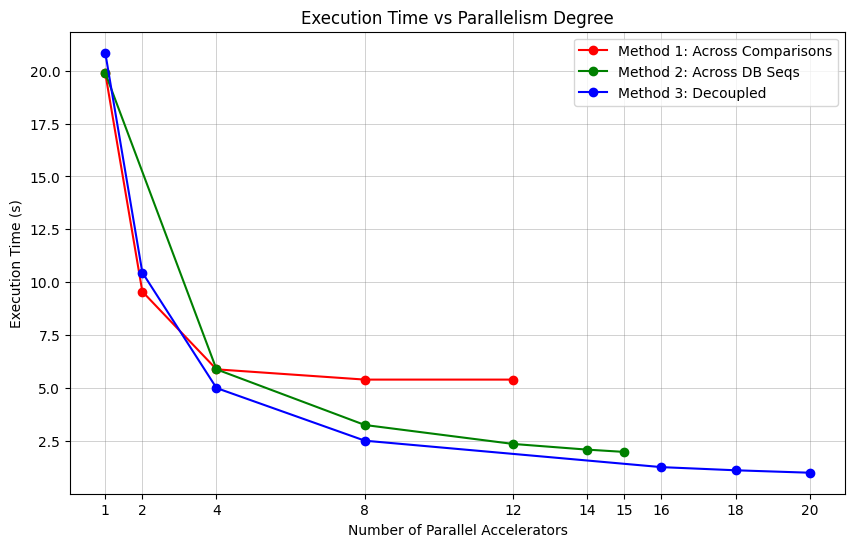

In [132]:
# Data for the second method
parallelism_1 = [1, 2, 4, 8, 12]
time_orig = [time_1, original_time_2, original_time_4, original_time_8, original_time_12]

# Data for the second method
parallelism_2 = [1, 4, 8, 12, 14, 15]
time_2 = [time_1, accross_time_4, accross_time_8, accross_time_12, accross_time_14, accross_time_15]

# Data for the third method
parallelism_3 = [1, 2, 4, 8, 16, 18, 20]
time_3 = [time_single_opt, decoupled_time_2, decoupled_time_4, decoupled_time_8, decoupled_time_16, decoupled_time_18, decoupled_time_20]

# Plotting both datasets
plt.figure(figsize=(10, 6))
plt.plot(parallelism_1, time_orig, label='Method 1: Across Comparisons', marker='o', color='red')
plt.plot(parallelism_2, time_2, label='Method 2: Across DB Seqs', marker='o', color='green')
plt.plot(parallelism_3, time_3, label='Method 3: Decoupled', marker='o', color='blue')
plt.xticks(list(set(parallelism_2 + parallelism_3)))  # union of all x ticks
plt.xlabel('Number of Parallel Accelerators')
plt.ylabel('Execution Time (s)')
plt.title('Execution Time vs Parallelism Degree')
plt.legend()
plt.grid(True, linestyle='-', linewidth=0.5, color='gray', alpha=0.5)  # Adjust grid appearance here
plt.savefig("Combined_Exec_Time.png", format="png", dpi=150)
plt.show()


#### SpeedUp vs. Number of Parallel Accelerators

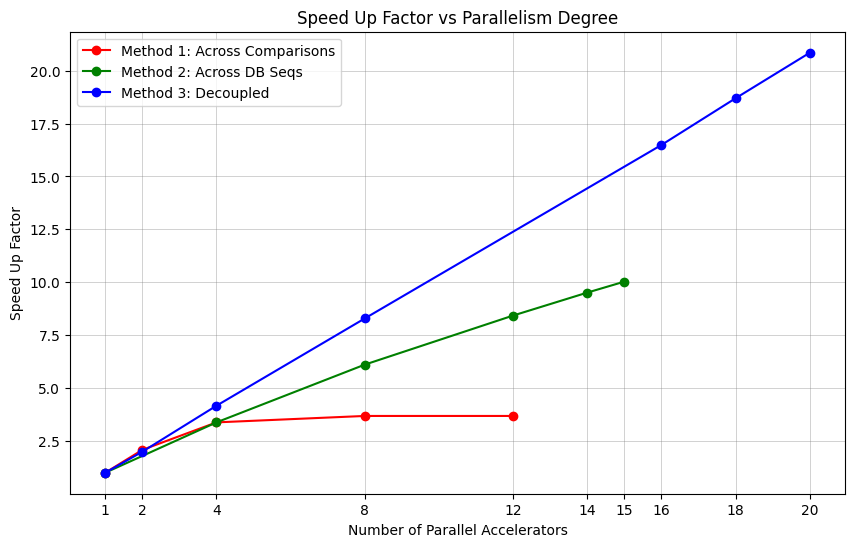

In [129]:
# Data for the second method
parallelism_1 = [1, 2, 4, 8, 12]
time_orig = [time_1, original_time_2, original_time_4, original_time_8, original_time_12]
speedup_1 = [time_1 / t for t in time_orig]

# Data for the second method
parallelism_2 = [1, 4, 8, 12, 14, 15]
time_2 = [time_1, accross_time_4, accross_time_8, accross_time_12, accross_time_14, accross_time_15]
speedup_2 = [time_1 / t for t in time_2]

# Data for the third method
parallelism_3 = [1, 2, 4, 8, 16, 18, 20]
time_3 = [time_single_opt, decoupled_time_2, decoupled_time_4, decoupled_time_8, decoupled_time_16, decoupled_time_18, decoupled_time_20]
speedup_3 = [time_single_opt / t for t in time_3]

# Plotting both datasets
plt.figure(figsize=(10, 6))
plt.plot(parallelism_1, speedup_1, label='Method 1: Across Comparisons', marker='o', color='red')
plt.plot(parallelism_2, speedup_2, label='Method 2: Across DB Seqs', marker='o', color='green')
plt.plot(parallelism_3, speedup_3, label='Method 3: Decoupled', marker='o', color='blue')
plt.xticks(list(set(parallelism_2 + parallelism_3)))  # union of all x ticks
plt.xlabel('Number of Parallel Accelerators')
plt.ylabel('Speed Up Factor')
plt.title('Speed Up Factor vs Parallelism Degree')
plt.legend()
plt.grid(True, linestyle='-', linewidth=0.5, color='gray', alpha=0.5)  # Adjust grid appearance here
plt.savefig("Combined_SpeedUp.png", format="png", dpi=150)
plt.show()


### Resource Cost vs Number of Parallel Accelerators

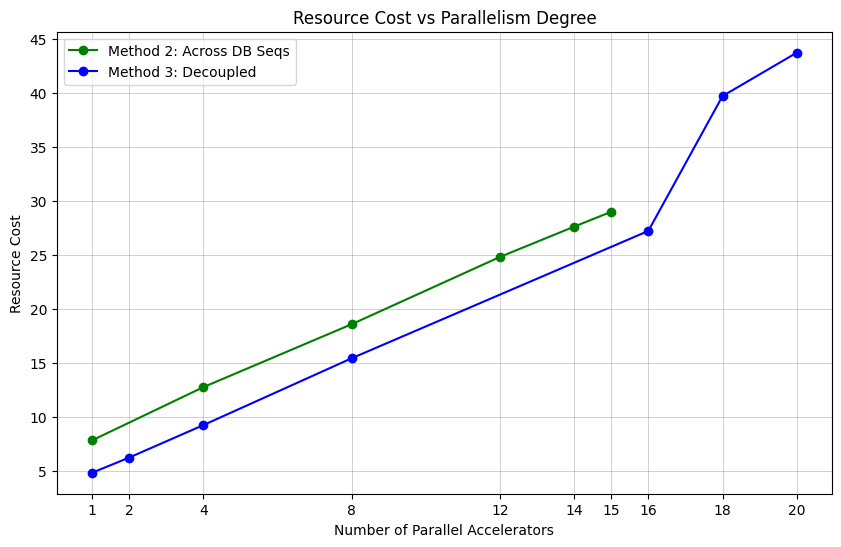

In [130]:
# Data for the second method
parallelism_2 = [1, 4, 8, 12, 14, 15]
cost_2 = [cost_1, accross_cost_4, accross_cost_8, accross_cost_12, accross_cost_14, accross_cost_15]

# Data for the third method
parallelism_3 = [1, 2, 4, 8, 16, 18, 20]
cost_3 = [cost_single_opt, decoupled_cost_2, decoupled_cost_4, decoupled_cost_8, decoupled_cost_16, decoupled_cost_18, decoupled_cost_20]

# Plotting both datasets
plt.figure(figsize=(10, 6))
plt.plot(parallelism_2, cost_2, label='Method 2: Across DB Seqs', marker='o', color='green')
plt.plot(parallelism_3, cost_3, label='Method 3: Decoupled', marker='o', color='blue')
plt.xticks(list(set(parallelism_2 + parallelism_3)))  # union of all x ticks
plt.xlabel('Number of Parallel Accelerators')
plt.ylabel('Resource Cost')
plt.title('Resource Cost vs Parallelism Degree')
plt.legend()
plt.grid(True, linestyle='-', linewidth=0.5, color='gray', alpha=0.5)  # Adjust grid appearance here
plt.savefig("Combined_Resource_Cost.png", format="png", dpi=150)
plt.show()
